# Pandas Analysis of Netflix Shows and Movies

In [339]:
import pandas as pd # pip install pandas # if not owned

import matplotlib.pyplot as plt

from pathlib import Path

# import os

# change the paths below

USER_PATH = Path(r"C:\Users\Mateusz\Desktop\ZBIORCZE\TECH\ANALIZA DANYCH\Python\Projekty MB") # <--- here

df = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "data_cleaned.csv") 

df_cast = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "cast.csv") 

df_category = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "category.csv") 

df_country = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "country.csv") 

## 1. Actor and actress appearances in shows and movies

In [340]:
# merging two tables

a1 = df_cast.merge(df_cast, how = "inner")

a1 = a1.merge(df[["show_id", "type"]], how = "inner")

In [341]:
# creating pivot table - counting actor and actress appearances in shows and movies

pt_a1 = pd.pivot_table(
    a1,
    values="show_id",
    index="cast",
    columns="type",
    aggfunc="count"
)

#pt_a1 = pt_a1.reset_index()

#pt_a1[pt_a1["cast"] != "Unknown"]

In [342]:
# getting rid of null values and sorting dataframe

pt_a1 = pt_a1[pt_a1[["Movie", "Show"]].notna().all(axis=1)]

pt_a1["Sum"] = pt_a1["Movie"] + pt_a1["Show"]

pt_a1 = pt_a1.sort_values(by = "Sum", ascending = False)

In [343]:
# float type -> int type for all columns

col = pt_a1.columns

pt_a1[col] = pt_a1[col].astype(int)

pt_a1 = pt_a1.iloc[1:11, :2].iloc[::-1] # 10 rows limit



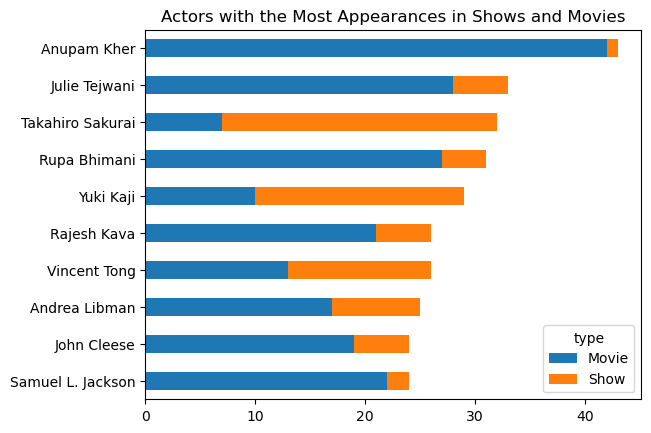

In [344]:
# chart and saving results

#pt_a1 = pt_a1.sort_values(by = "Sum", ascending=True)

pt_a1.plot(kind = "barh", title = "Actors with the Most Appearances in Shows and Movies", stacked = True, ylabel = "")

pt_a1.to_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "results" / "actors_appearances.csv", index = True) 

## 2. Kategorie i śrendia długość trwania

In [345]:
a1.groupby("cast")["type"].count()

cast
 Jr.                     2
"Riley" Lakdhar Dridi    1
'Najite Dede             2
2 Chainz                 1
2Mex                     1
                        ..
Şevket Çoruh             1
Şinasi Yurtsever         3
Şükran Ovalı             1
Şükrü Özyıldız           2
Ṣọpẹ́ Dìrísù             1
Name: type, Length: 36440, dtype: int64

In [346]:
# setting up indexes
"""
df.set_index(["show_id"], inplace = True) 

df = df.sort_index()

df_cast.set_index(["show_id"], inplace = True) 

df_cast = df_cast.sort_index()

df_country.set_index(["show_id"], inplace = True) 

df_country = df_country.sort_index()

df_category.set_index(["show_id"], inplace = True) 

df_category = df_category.sort_index()
"""

'\ndf.set_index(["show_id"], inplace = True) \n\ndf = df.sort_index()\n\ndf_cast.set_index(["show_id"], inplace = True) \n\ndf_cast = df_cast.sort_index()\n\ndf_country.set_index(["show_id"], inplace = True) \n\ndf_country = df_country.sort_index()\n\ndf_category.set_index(["show_id"], inplace = True) \n\ndf_category = df_category.sort_index()\n'

In [347]:
# top 10 directors with the most directed shows / movies

directors = df[df['director'] != "Unknown"]

directors = directors.groupby("director").agg({"title": ["count"]})

directors.sort_values(by=[('title', 'count')], ascending=False).head(10)

,title
,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12


In [348]:
# top 10 directors with the most directed shows / movies

directors = df[df['director'] != "Unknown"]

directors = directors.groupby("director").agg({"title": ["count"]})

dr = directors.sort_values(by=[('title', 'count')], ascending=False).head(10)

<Axes: xlabel='director'>

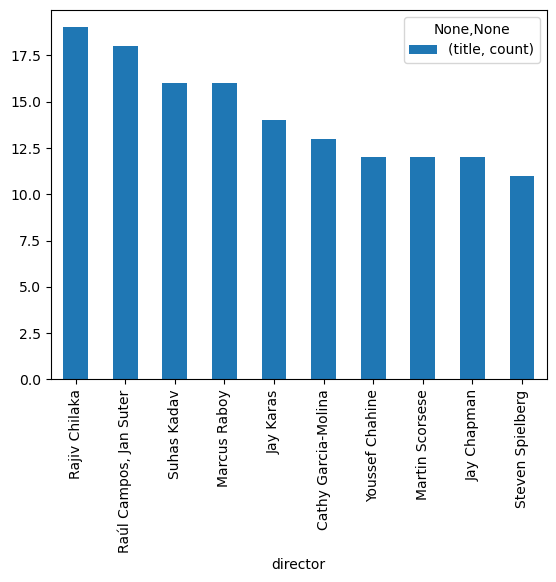

In [349]:
dr.plot(kind = 'bar')

In [350]:
#pivot table z długością filmów i seriali bez null values

# najpopulaniersi aktorzy, kraje i kategorie

## TV shows and movies duration - Comparision

In [351]:
duration = df.groupby("type")["length"].agg(["mean", "median"])

duration.round(2)

movie_duration = duration.iloc[0]

show_duration = duration.iloc[1]

In [352]:
duration

,mean,median
type,,
Movie,99.577187,98.0
Show,1.764948,1.0


<Axes: title={'center': 'Movie Duration'}, ylabel='Minutes'>

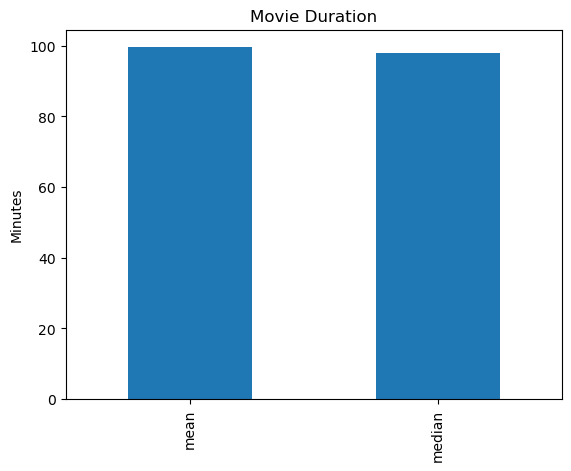

In [353]:
movie_duration.plot(kind = 'bar', title = "Movie Duration", ylabel = "Minutes")

<Axes: title={'center': 'Show Duration'}, ylabel='Seasons'>

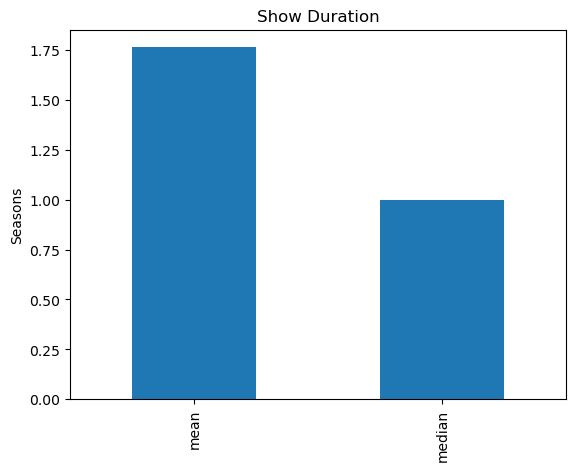

In [354]:
show_duration.plot(kind = 'bar', title = "Show Duration", ylabel = "Seasons")

In [355]:
category = df.merge(df_category, how = "inner")


In [356]:
# print(max_duration.columns)

In [357]:
category["listed_in"] = category["listed_in"].str.replace("TV","")

category["listed_in"] = category["listed_in"].str.replace("Movies","")

category["listed_in"] = category["listed_in"].str.strip() # lstrip was needed

In [358]:
pt_category = pd.pivot_table(
    category,
    values="length",
    index="listed_in",
    columns="type",
    aggfunc="count"
)

In [359]:
pt_category = pt_category.reset_index()


df2 = pt_category["Movie"] + pt_category["Show"]

In [360]:
#pt_category["Comparision"]

In [361]:
pt_category = pt_category.reset_index()

# pt_category

In [362]:
pt_category.groupby("listed_in")[["Movie", "Show"]].sum()

type,Movie,Show
listed_in,,
,54.0,0.0
Action & Adventure,128.0,1.0
Anime Features,1.0,0.0
Anime Series,0.0,10.0
Children & Family,215.0,0.0
Comedies,110.0,69.0
Documentaries,359.0,0.0
Docuseries,0.0,85.0
Dramas,138.0,35.0


In [363]:
max_duration = df.groupby("type")["length"].max()

